> # CNN Structure

A typical CNN tructure is like under image. 

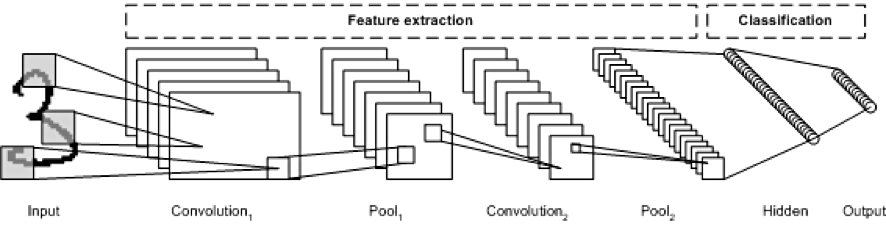

Image is getting smaller as passing network. But it is getting deeper because of convolutional layer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings ; warnings.filterwarnings("ignore")

In [2]:
fasion_data = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fasion_data.load_data()

In [12]:
X_train_scd, X_valid = (X_train[5000:] / 255.0) , (X_train[:5000] / 255.0)
y_train_scd, y_valid = y_train[5000:] , y_train[:5000]
X_test_scd = X_test / 255.0

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [15]:
history = model.fit(X_train_scd, y_train_scd, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 315s 183ms/step - loss: 1.3587 - accuracy: 0.4979 - val_loss: 0.7204 - val_accuracy: 0.7386
Epoch 2/30
1719/1719 [==============================] - 327s 190ms/step - loss: 0.8284 - accuracy: 0.6973 - val_loss: 0.6093 - val_accuracy: 0.7720
Epoch 3/30
1719/1719 [==============================] - 314s 183ms/step - loss: 0.6858 - accuracy: 0.7517 - val_loss: 0.4811 - val_accuracy: 0.8288
Epoch 4/30
1719/1719 [==============================] - 318s 185ms/step - loss: 0.6114 - accuracy: 0.7804 - val_loss: 0.4615 - val_accuracy: 0.8304
Epoch 5/30
1719/1719 [==============================] - 334s 194ms/step - loss: 0.5536 - accuracy: 0.8015 - val_loss: 0.4275 - val_accuracy: 0.8496
Epoch 6/30
1719/1719 [==============================] - 301s 175ms/step - loss: 0.5193 - accuracy: 0.8163 - val_loss: 0.3912 - val_accuracy: 0.8626
Epoch 7/30
1719/1719 [==============================] - 313s 182ms/step - loss: 0.4897 - accuracy: 0.8277 - val_

In [18]:
model.save("model.h5")

In [19]:
model.evaluate(X_test_scd, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.2905 - accuracy: 0.8978


[0.29053187370300293, 0.8978000283241272]

There are various CNN structure.

#### - LeNet-5

This is used for MNIST recognition problem.

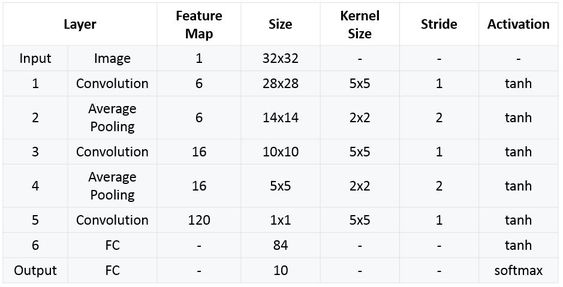

Zero padding is applied to images so 28X28 image becomes 32X32 image. And at output layer, it prints uclid distance between input vector and weight vector. Each output estimates probability of belonging to a class.

#### - AlexNet

This sturucture is simillar with LeNet-5 but more big and deep. And it stacks filter layer on filter layer.

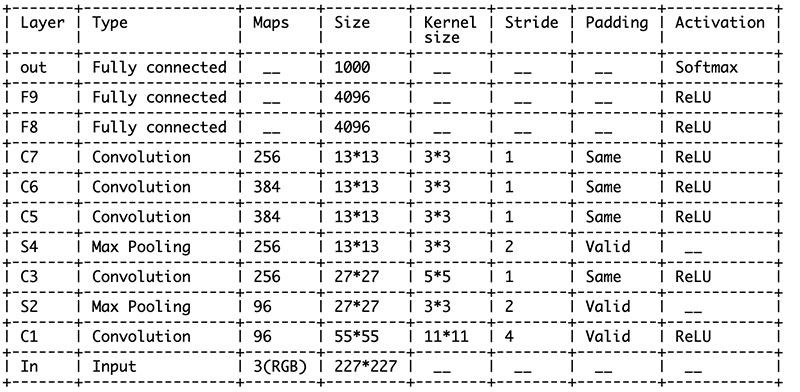

To avoid overfitting, we can consider data augmentation. This altificalartifically generate some train samples through move, rotate or reverse train images. Then model can be less sensitive to object's location, direction or scale change. And we can also increase number of train samples.

And AlexNet uses LRN competitive normalization step. The most activation neuron suppress neuron in same location of different feature map. This feature map be differentiated to other things and search features in wide view. So it increases generalization performance.

$b_i = a_i(k+\alpha \displaystyle\sum^{j_{high}}_{j=j_{low}} {\alpha_j}^2)^{-\beta}$

$j_{high} = min(i+\frac{r}{2}, f_n-1) \quad \quad j_{low} = max(0,i-\frac{r}{2})$

$b_i$ is noramlized print of neuron that is located at $i$th feature map, $u$th row, $v$th column. $\alpha_i$ is neuron's active value after ReLU step before normalization step. $k, \alpha, \beta, r$ are hyperparameter. $k$ is bias and $r$ is depth radius. $f_n$ is number of feature map. If $r=2$ and a neuron is strongly activated, it will suppress neuron's activation in under and above feaure map.

#### - GooGLeNet

This network has inception module subnetwork so it effectively uses parameters. 

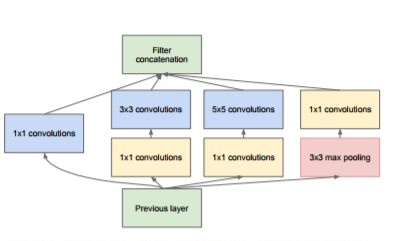

All layers use 1 stride SAME padding and RELU activation function. Input signal is copied and sent to different 4 layers. Each second layer uses different kernel size and recognize different size pattern. Then we can connect all outputs in depth-wise at depth concatenation layer.



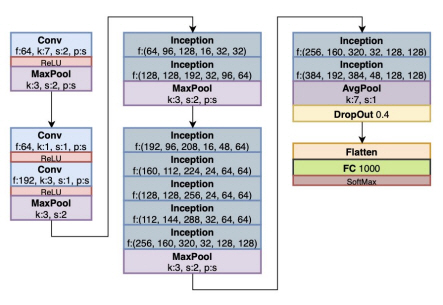

First 2 layers reduce image's height and width in 4 times. LRN layer helps previous layer to learn various feature. In next two layers, first layer operates like bottleneck. And maxpooling layer reduces image's height and width in half. And 9 inception module contiues. 2 maxpooling layer are put between them to exceed calculation speed and dimension reduction. And AngPool layer prints average of each feature map. Next dropout for regularizaton, 1000s unit and softmax print probability of belonging to each class.

#### - ResNet

Core element of this network is skip connection. A signal that is injected to a layer is added to output of high level layer.

Purpose of training neural network is to modeling a function $h(\mathbf{x})$. If we add input $\mathbf{x}$ network will learn $f(\mathbf{x})=h(\mathbf{x})-\mathbf{x}$ instead of $f(\mathbf{x})$. This is residual learning.

When we initialize general neural network, network print 0 because weights are almost 0. If we add skip connection, this network will print a value same with input. So, it is an equivalent function. and if we add much skip connection, although some layers are not trained, network can start train. Deep residual network can be seen like a stack of residual unit which is a small network with skip connection.

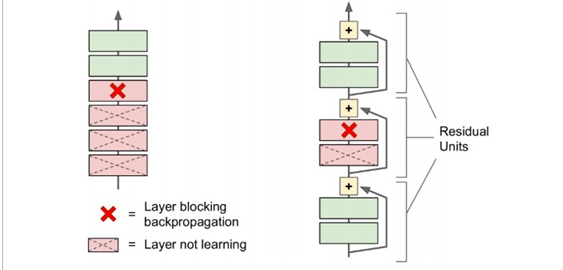

This structure starts and ends same with GoogLeNet. Each residuala unit uses batch normalization and ReLU, 3X3 kernel and there are two convolution layer that remain space information. Number of feature map increases 2 times each some residual unit, height and width becomes half. then input size is different to output so it can't be added to output of residual unit. To overcome the problem, we pass input through 1x1 convolution whose stride is 1 and has same feature map number.

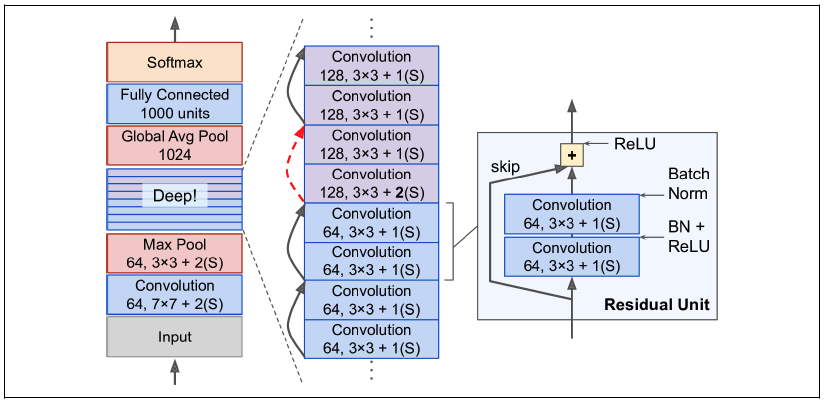

#### - Xception

This idea combines idea of GoogLeNet and ResNet. But inception module is substituted by depthwise separable convolution layer. This layer supposes we can modeling by seperating spatial pattern and channel pattern. First, apply a spatial filter to eaxh input feature map. Next investigate channel pattern. We have to avoid to use it next to layer with few channel like input layer bcecause it has one spatial filter at each input channel. So Xception starts with 2 general convilution layer. Left are spatial convolution layer.

#### - SENet

SENet increases its performance by adding SE block at all units in original structure.

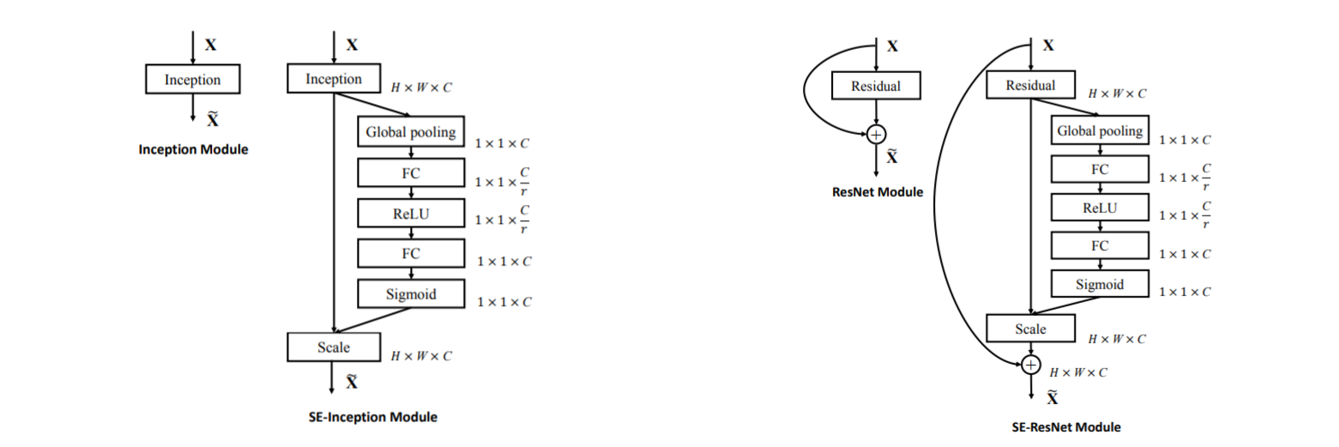